#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string

#### Import Data Set

In [3]:
df = pd.read_csv('spam.csv',  encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 colunns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# check for duplicate values
df.duplicated().sum()

403

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

#### EDA

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

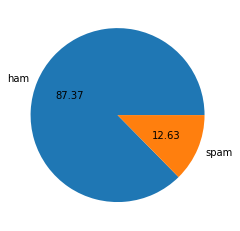

In [13]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
#number of characters in each sms
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
#nltk.download('punkt')

In [16]:
# number of words in each sms
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
#number of senetences in each sms
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


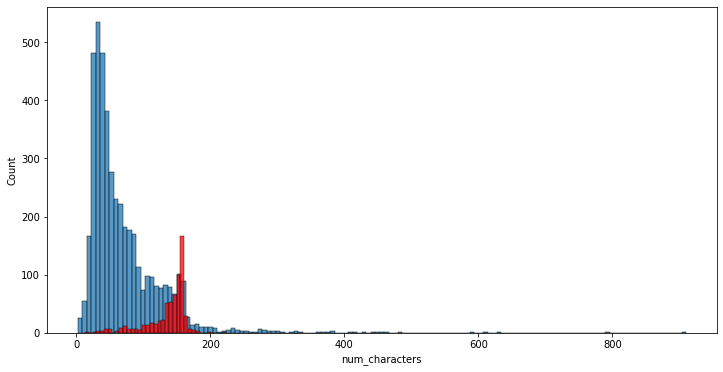

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

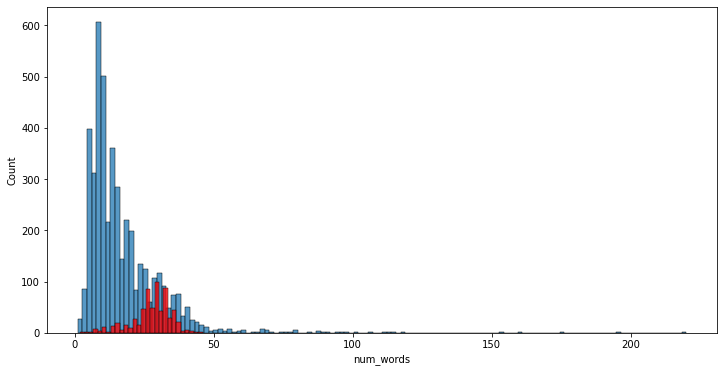

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

In [26]:
#sns.pairplot(df,hue='target')

<AxesSubplot:>

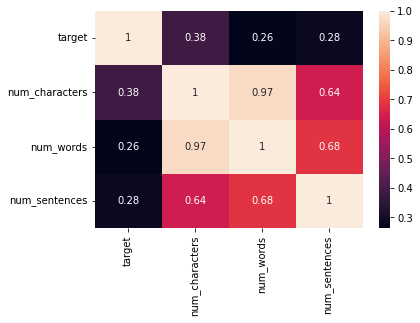

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
#checking stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
#checking punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('eating')
ps.stem('loved')
ps.stem('university'),ps.stem('universal')

('univers', 'univers')

#### Data Preprocessing

In [27]:
def transform_text(text):
    #convert to lower case
    text = text.lower()
    #word tokenize
    text = nltk.word_tokenize(text)
    #remove special character and keep only alphanumeric
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    #removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [28]:
#testing function
transform_text('Hi! How are you? I loved the way you were presenting!')

'hi love way present'

In [29]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
#apply function to text
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Feature Extraction

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [35]:
X = df['transformed_text']
y = df['target']
accuracy = []
precision = []
algo = []

In [36]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    y_pred = pipeline_model.predict(x_test)
    current_accuracy = pipeline_model.score(x_test, y_test) 
    current_precision = precision_score(y_test, y_pred)

    accuracy.append(current_accuracy)
    precision.append(current_precision)
    
    print('Accuracy:', current_accuracy)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', current_precision)
    print(classification_report(y_test, y_pred))
    
#stratify = to ensure that the train and test sets have approximately the same percentage of samples of each target class

In [37]:
#SVM
#C is penalty parameter
from sklearn.svm import SVC
model = SVC(C=3)
classify(model, X, y)
algo.append('SVC')

Accuracy: 0.9822119102861562
Confusion Matrix:
[[1130    0]
 [  23  140]]
Precision: 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1130
           1       1.00      0.86      0.92       163

    accuracy                           0.98      1293
   macro avg       0.99      0.93      0.96      1293
weighted avg       0.98      0.98      0.98      1293



In [110]:
#SVM
from sklearn.svm import SVC
model = SVC(kernel='sigmoid', gamma=1.0)
classify(model, X, y)

Accuracy: 98.22119102861562
Confusion Matrix:
[[1126    4]
 [  19  144]]
Precision: 0.972972972972973
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1130
           1       0.97      0.88      0.93       163

    accuracy                           0.98      1293
   macro avg       0.98      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293



In [38]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)
algo.append('KNN')

Accuracy: 0.9064191802010828
Confusion Matrix:
[[1130    0]
 [ 121   42]]
Precision: 1.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1130
           1       1.00      0.26      0.41       163

    accuracy                           0.91      1293
   macro avg       0.95      0.63      0.68      1293
weighted avg       0.92      0.91      0.88      1293



In [39]:
#random forest
#n_estimators = no of trees you want to build before voting
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60, random_state=5)
classify(model, X, y)
algo.append('RF')

Accuracy: 0.9752513534416086
Confusion Matrix:
[[1130    0]
 [  32  131]]
Precision: 1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1130
           1       1.00      0.80      0.89       163

    accuracy                           0.98      1293
   macro avg       0.99      0.90      0.94      1293
weighted avg       0.98      0.98      0.97      1293



In [40]:
##adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=2)
classify(model, X, y)
algo.append('ADB')

Accuracy: 0.962877030162413
Confusion Matrix:
[[1117   13]
 [  35  128]]
Precision: 0.9078014184397163
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1130
           1       0.91      0.79      0.84       163

    accuracy                           0.96      1293
   macro avg       0.94      0.89      0.91      1293
weighted avg       0.96      0.96      0.96      1293



In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)
algo.append('LR')

Accuracy: 0.9675174013921114
Confusion Matrix:
[[1127    3]
 [  39  124]]
Precision: 0.9763779527559056
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1130
           1       0.98      0.76      0.86       163

    accuracy                           0.97      1293
   macro avg       0.97      0.88      0.92      1293
weighted avg       0.97      0.97      0.97      1293



In [42]:
print(algo, accuracy, precision)

['SVC', 'KNN', 'RF', 'ADB', 'LR'] [0.9822119102861562, 0.9064191802010828, 0.9752513534416086, 0.962877030162413, 0.9675174013921114] [1.0, 1.0, 1.0, 0.9078014184397163, 0.9763779527559056]


In [43]:
performance_df = pd.DataFrame({'Algorithm':algo, 'Accuracy':accuracy, 'Precision':precision}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.982212,1.000000
1,KNN,0.906419,1.000000
2,RF,0.975251,1.000000
4,LR,0.967517,0.976378
3,ADB,0.962877,0.907801


In [44]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.982212
1,KNN,Accuracy,0.906419
2,RF,Accuracy,0.975251
3,LR,Accuracy,0.967517
4,ADB,Accuracy,0.962877
5,SVC,Precision,1.000000
6,KNN,Precision,1.000000
7,RF,Precision,1.000000
8,LR,Precision,0.976378
9,ADB,Precision,0.907801


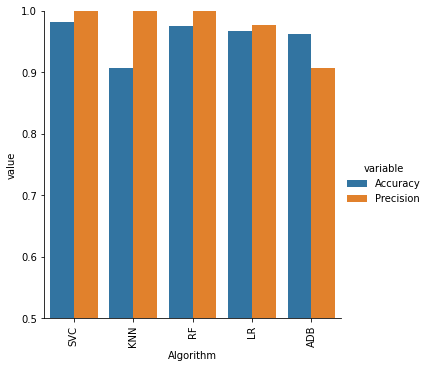

In [45]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()